## Задание 1: Эксперименты с глубиной сети (30 баллов)

### 1.1 Сравнение моделей разной глубины (15 баллов)
```python
# Создайте и обучите модели с различным количеством слоев:
# - 1 слой (линейный классификатор)
# - 2 слоя (1 скрытый)
# - 3 слоя (2 скрытых)
# - 5 слоев (4 скрытых)
# - 7 слоев (6 скрытых)
# 
# Для каждого варианта:
# - Сравните точность на train и test
# - Визуализируйте кривые обучения
# - Проанализируйте время обучения
```


In [2]:
import torch
from fully_connected_basics.datasets import get_mnist_loaders
from fully_connected_basics.models import FullyConnectedModel
from fully_connected_basics.trainer import train_model
from fully_connected_basics.utils import plot_training_history, count_parameters

In [10]:
device = torch.device('cpu')

train_loader, test_loader = get_mnist_loaders(batch_size=64)

#### <b>1 слой

Model parameters: 7850


100%|██████████| 157/157 [00:02<00:00, 69.12it/s]


Epoch 1/5:
Train Loss: 0.3924, Train Acc: 0.8887
Test Loss: 0.2881, Test Acc: 0.9164
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.46it/s]


Epoch 2/5:
Train Loss: 0.2930, Train Acc: 0.9170
Test Loss: 0.2783, Test Acc: 0.9205
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.87it/s]


Epoch 3/5:
Train Loss: 0.2821, Train Acc: 0.9208
Test Loss: 0.2725, Test Acc: 0.9239
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.82it/s]


Epoch 4/5:
Train Loss: 0.2752, Train Acc: 0.9225
Test Loss: 0.2762, Test Acc: 0.9227
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.95it/s]


Epoch 5/5:
Train Loss: 0.2709, Train Acc: 0.9242
Test Loss: 0.2763, Test Acc: 0.9196
--------------------------------------------------


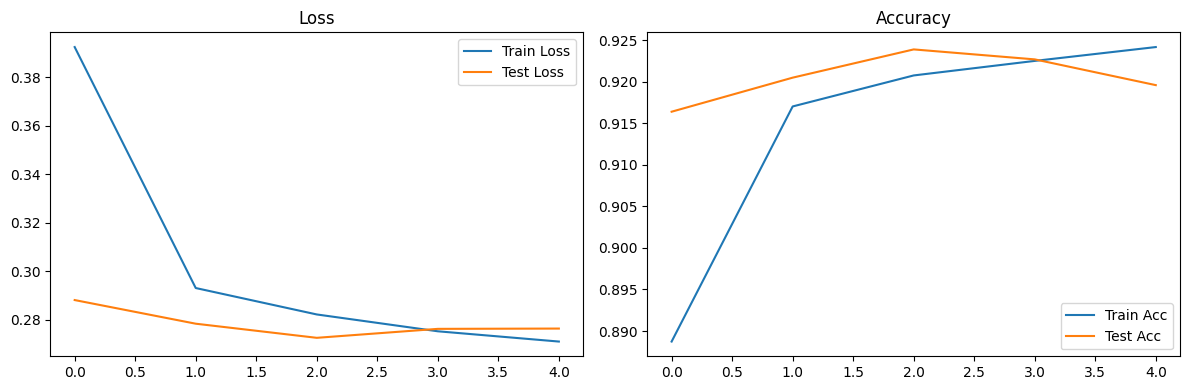

In [5]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Точнонсть модели для тренировочной выборки быстро увеличивается в первую эпохуй и затем медленно растет в последующие 4 эпохи. По тестовой выборке видим, что точность сначала улучшалась до 2 эпохи, а затем снижалась. Происходило переобучение модели

Каждая эпоха обучалась 16 секунд

#### <b>2 слоя

Model parameters: 101770


100%|██████████| 157/157 [00:02<00:00, 63.34it/s]


Epoch 1/5:
Train Loss: 0.2617, Train Acc: 0.9232
Test Loss: 0.1404, Test Acc: 0.9576
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 73.26it/s]


Epoch 2/5:
Train Loss: 0.1136, Train Acc: 0.9667
Test Loss: 0.0964, Test Acc: 0.9709
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.35it/s]


Epoch 3/5:
Train Loss: 0.0793, Train Acc: 0.9757
Test Loss: 0.0861, Test Acc: 0.9728
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.05it/s]


Epoch 4/5:
Train Loss: 0.0604, Train Acc: 0.9812
Test Loss: 0.0805, Test Acc: 0.9769
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.99it/s]


Epoch 5/5:
Train Loss: 0.0485, Train Acc: 0.9843
Test Loss: 0.0771, Test Acc: 0.9764
--------------------------------------------------


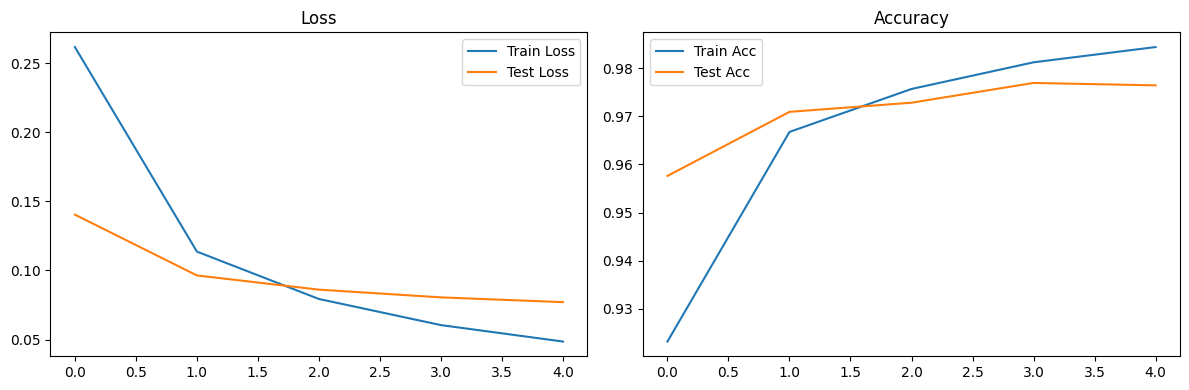

In [6]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "relu"}
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Точнонсть модели на тренировочной выборки растет на протяжение всех эпох. На тестовой выборке точность до 3 эпохи сначала увеличивалась, потом немного упала.


По сравнению с линейным классификатором, точность сильно увеличилась, а скорость обучения каждой эпохи возросла на 1 секунду


#### <b>3 слоя

Model parameters: 109386


100%|██████████| 157/157 [00:02<00:00, 68.16it/s]


Epoch 1/5:
Train Loss: 0.2654, Train Acc: 0.9222
Test Loss: 0.1266, Test Acc: 0.9624
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.25it/s]


Epoch 2/5:
Train Loss: 0.1102, Train Acc: 0.9665
Test Loss: 0.0974, Test Acc: 0.9692
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 75.24it/s]


Epoch 3/5:
Train Loss: 0.0781, Train Acc: 0.9754
Test Loss: 0.1102, Test Acc: 0.9667
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.29it/s]


Epoch 4/5:
Train Loss: 0.0595, Train Acc: 0.9812
Test Loss: 0.0796, Test Acc: 0.9769
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.56it/s]


Epoch 5/5:
Train Loss: 0.0495, Train Acc: 0.9842
Test Loss: 0.0793, Test Acc: 0.9765
--------------------------------------------------


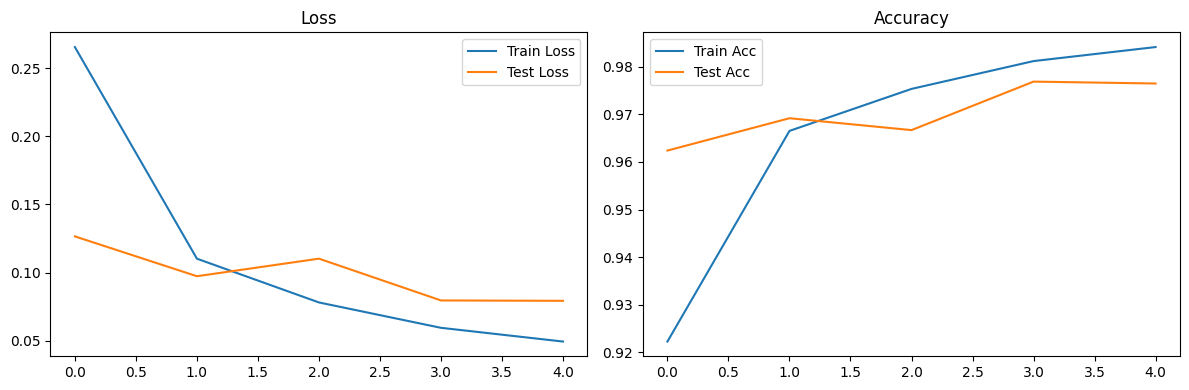

In [7]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Точность модели на тренировочной выборки растет на протяжение всех эпох, основное увеличение приходилось на 1 эпоху. 
На тестовой выборке видно, что точность увеличивалась скачкообразно: сначала росла, потом падала и так снова ().

По сравнению с моделью, у которой 2 слоя, точность почти такая же, скорость обучения каждой эпохи осталась такой же, какой была

#### <b>5 слоев

Model parameters: 111514


100%|██████████| 157/157 [00:02<00:00, 62.80it/s]


Epoch 1/5:
Train Loss: 0.3863, Train Acc: 0.8797
Test Loss: 0.1717, Test Acc: 0.9483
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.64it/s]


Epoch 2/5:
Train Loss: 0.1366, Train Acc: 0.9583
Test Loss: 0.1335, Test Acc: 0.9611
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.28it/s]


Epoch 3/5:
Train Loss: 0.0960, Train Acc: 0.9710
Test Loss: 0.1031, Test Acc: 0.9684
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.28it/s]


Epoch 4/5:
Train Loss: 0.0740, Train Acc: 0.9770
Test Loss: 0.0973, Test Acc: 0.9720
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.84it/s]


Epoch 5/5:
Train Loss: 0.0599, Train Acc: 0.9811
Test Loss: 0.0828, Test Acc: 0.9755
--------------------------------------------------


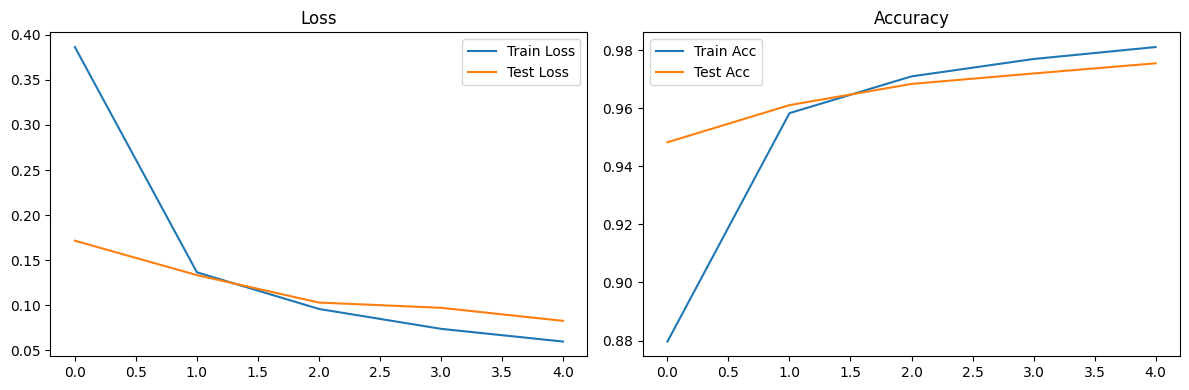

In [8]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
        {"type": "linear", "size": 32}, 
        {"type": "relu"},
        {"type": "linear", "size": 16}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Тут происходит рост точности на обеих выборках

По сравнению с моделью, у которой 3 слоя, точность почти такая же, скорость обучения каждой эпохи стала 18 секунд (вместо 17)

#### <b>7 слоев

Model parameters: 111566


100%|██████████| 157/157 [00:02<00:00, 69.16it/s]


Epoch 1/5:
Train Loss: 0.8314, Train Acc: 0.7215
Test Loss: 0.3985, Test Acc: 0.8991
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.95it/s]


Epoch 2/5:
Train Loss: 0.3059, Train Acc: 0.9253
Test Loss: 0.2657, Test Acc: 0.9345
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.40it/s]


Epoch 3/5:
Train Loss: 0.2153, Train Acc: 0.9476
Test Loss: 0.2164, Test Acc: 0.9481
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 73.59it/s]


Epoch 4/5:
Train Loss: 0.1669, Train Acc: 0.9587
Test Loss: 0.1783, Test Acc: 0.9590
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.44it/s]


Epoch 5/5:
Train Loss: 0.1319, Train Acc: 0.9665
Test Loss: 0.1894, Test Acc: 0.9554
--------------------------------------------------


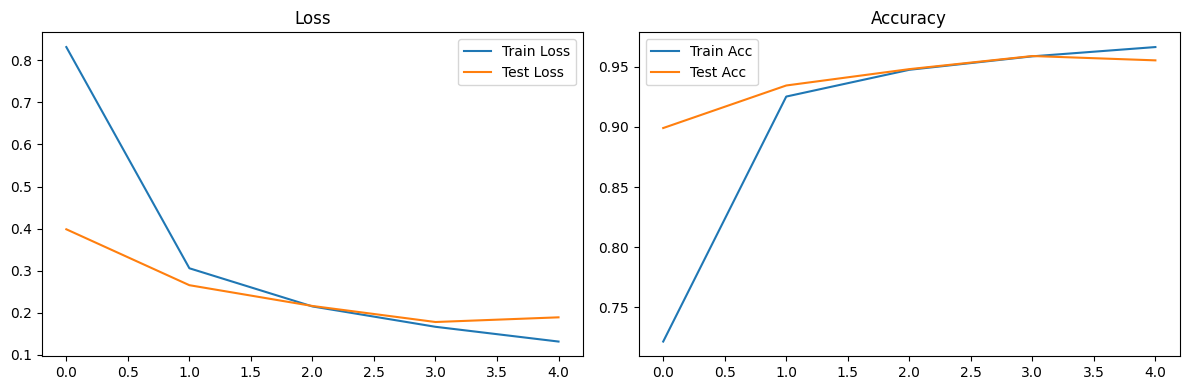

In [9]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
        
        {"type": "linear", "size": 32}, 
        {"type": "relu"},
        {"type": "linear", "size": 16}, 
        {"type": "relu"},
        
        {"type": "linear", "size": 8}, 
        {"type": "relu"},   
        {"type": "linear", "size": 4}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Точность модели на тренировочной выборки растет на протяжение всех эпох, основное увеличение приходилось на 1 эпоху.
До 3 эпохи точность модели на тестовой выборке растет, затем падает 

По сравнению с моделью, у которой 5 слоев, точность ниже

### 1.2 Анализ переобучения (15 баллов)
```python
# Исследуйте влияние глубины на переобучение:
# - Постройте графики train/test accuracy по эпохам
# - Определите оптимальную глубину для каждого датасета
# - Добавьте Dropout и BatchNorm, сравните результаты
# - Проанализируйте, когда начинается переобучение
```

По графикам выше для датасета mnist оптимальной глубиной являетсяь та, что в 5 слоев, т.к. точность test уввеличивалась постояно.

Без Dropout и BatchNorm:

Train Loss: 0.0599, Train Acc: 0.9811

Test Loss: 0.0828, Test Acc: 0.9755

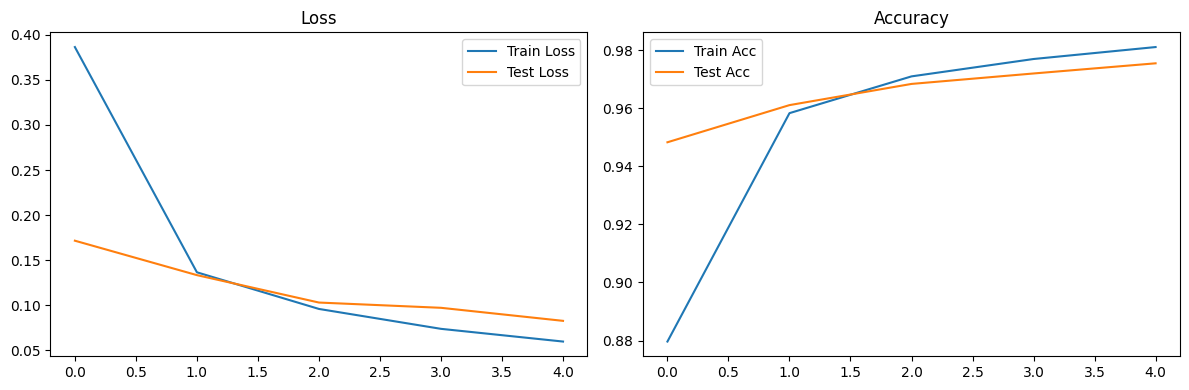

С Dropout и BatchNorm:

Model parameters: 111770


100%|██████████| 157/157 [00:02<00:00, 66.27it/s]


Epoch 1/5:
Train Loss: 0.5768, Train Acc: 0.8242
Test Loss: 0.1996, Test Acc: 0.9424
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.55it/s]


Epoch 2/5:
Train Loss: 0.2672, Train Acc: 0.9265
Test Loss: 0.1398, Test Acc: 0.9599
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.48it/s]


Epoch 3/5:
Train Loss: 0.2139, Train Acc: 0.9412
Test Loss: 0.1221, Test Acc: 0.9644
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.00it/s]


Epoch 4/5:
Train Loss: 0.1814, Train Acc: 0.9512
Test Loss: 0.1093, Test Acc: 0.9682
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.44it/s]


Epoch 5/5:
Train Loss: 0.1591, Train Acc: 0.9553
Test Loss: 0.0963, Test Acc: 0.9724
--------------------------------------------------


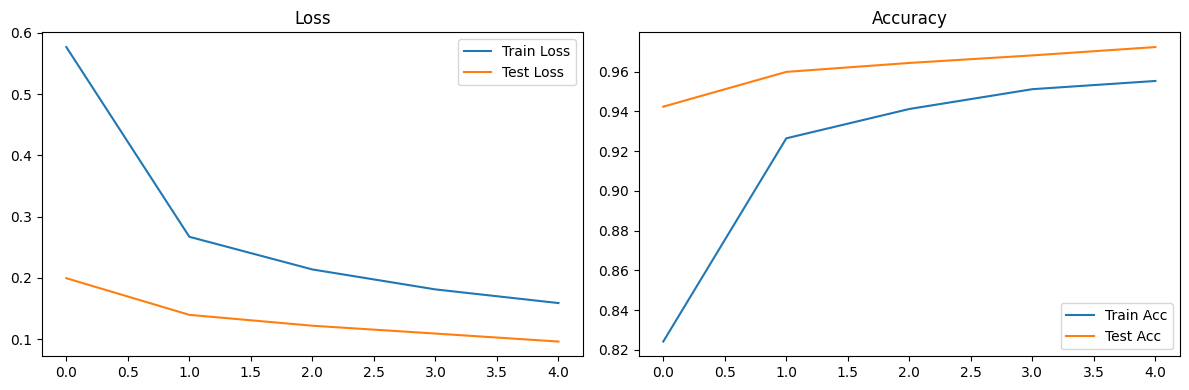

In [14]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.2},
        
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
        {"type": "dropout", "rate": 0.1},
        
        {"type": "linear", "size": 32}, 
        {"type": "relu"},
        
        {"type": "linear", "size": 16}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Точность немного уменьшилась по сравнению с моделью без дропаута и батчнорма

Для большей наглядности увеличил количество эпох на 10 (было 5 стало 15):

Model parameters: 111514


100%|██████████| 157/157 [00:02<00:00, 66.27it/s]


Epoch 1/15:
Train Loss: 0.4096, Train Acc: 0.8757
Test Loss: 0.1834, Test Acc: 0.9445
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.13it/s]


Epoch 2/15:
Train Loss: 0.1470, Train Acc: 0.9571
Test Loss: 0.1428, Test Acc: 0.9606
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 58.61it/s]


Epoch 3/15:
Train Loss: 0.1035, Train Acc: 0.9687
Test Loss: 0.1088, Test Acc: 0.9679
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.81it/s]


Epoch 4/15:
Train Loss: 0.0779, Train Acc: 0.9759
Test Loss: 0.0879, Test Acc: 0.9721
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 75.42it/s]


Epoch 5/15:
Train Loss: 0.0640, Train Acc: 0.9802
Test Loss: 0.0899, Test Acc: 0.9742
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 47.91it/s]


Epoch 6/15:
Train Loss: 0.0535, Train Acc: 0.9831
Test Loss: 0.0954, Test Acc: 0.9743
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.24it/s]


Epoch 7/15:
Train Loss: 0.0438, Train Acc: 0.9862
Test Loss: 0.0947, Test Acc: 0.9741
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 72.88it/s]


Epoch 8/15:
Train Loss: 0.0379, Train Acc: 0.9880
Test Loss: 0.0910, Test Acc: 0.9758
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.69it/s]


Epoch 9/15:
Train Loss: 0.0344, Train Acc: 0.9887
Test Loss: 0.0891, Test Acc: 0.9769
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.59it/s]


Epoch 10/15:
Train Loss: 0.0307, Train Acc: 0.9901
Test Loss: 0.0872, Test Acc: 0.9772
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.27it/s]


Epoch 11/15:
Train Loss: 0.0242, Train Acc: 0.9920
Test Loss: 0.0920, Test Acc: 0.9779
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.54it/s]


Epoch 12/15:
Train Loss: 0.0232, Train Acc: 0.9922
Test Loss: 0.0909, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.69it/s]


Epoch 13/15:
Train Loss: 0.0243, Train Acc: 0.9921
Test Loss: 0.0922, Test Acc: 0.9783
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.89it/s]


Epoch 14/15:
Train Loss: 0.0175, Train Acc: 0.9944
Test Loss: 0.1016, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.59it/s]


Epoch 15/15:
Train Loss: 0.0192, Train Acc: 0.9936
Test Loss: 0.1077, Test Acc: 0.9739
--------------------------------------------------


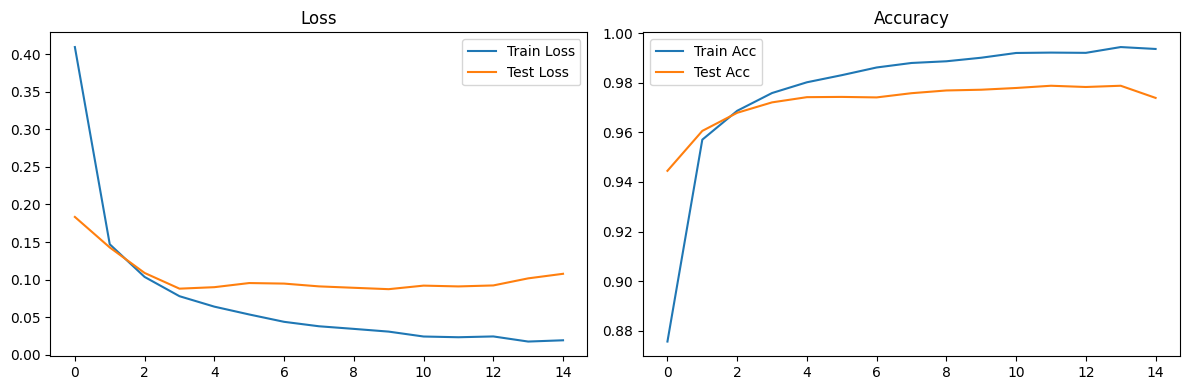

In [15]:
# Без Dropout и BatchNorm:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
        {"type": "linear", "size": 32}, 
        {"type": "relu"},
        {"type": "linear", "size": 16}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=15, device=str(device))

plot_training_history(history) 

Model parameters: 576074


  0%|          | 0/938 [00:00<?, ?it/s]

100%|██████████| 157/157 [00:02<00:00, 69.15it/s]


Epoch 1/15:
Train Loss: 0.2635, Train Acc: 0.9207
Test Loss: 0.1163, Test Acc: 0.9659
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.35it/s]


Epoch 2/15:
Train Loss: 0.1214, Train Acc: 0.9634
Test Loss: 0.0838, Test Acc: 0.9742
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.94it/s]


Epoch 3/15:
Train Loss: 0.0940, Train Acc: 0.9713
Test Loss: 0.0718, Test Acc: 0.9776
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.82it/s]


Epoch 4/15:
Train Loss: 0.0778, Train Acc: 0.9760
Test Loss: 0.0716, Test Acc: 0.9803
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 71.03it/s]


Epoch 5/15:
Train Loss: 0.0684, Train Acc: 0.9791
Test Loss: 0.0636, Test Acc: 0.9818
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.62it/s]


Epoch 6/15:
Train Loss: 0.0576, Train Acc: 0.9822
Test Loss: 0.0789, Test Acc: 0.9777
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.34it/s]


Epoch 7/15:
Train Loss: 0.0527, Train Acc: 0.9836
Test Loss: 0.0710, Test Acc: 0.9809
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.82it/s]


Epoch 8/15:
Train Loss: 0.0475, Train Acc: 0.9849
Test Loss: 0.0635, Test Acc: 0.9810
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.48it/s]


Epoch 9/15:
Train Loss: 0.0431, Train Acc: 0.9864
Test Loss: 0.0633, Test Acc: 0.9811
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.36it/s]


Epoch 10/15:
Train Loss: 0.0381, Train Acc: 0.9878
Test Loss: 0.0597, Test Acc: 0.9838
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.13it/s]


Epoch 11/15:
Train Loss: 0.0389, Train Acc: 0.9880
Test Loss: 0.0644, Test Acc: 0.9834
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.81it/s]


Epoch 12/15:
Train Loss: 0.0315, Train Acc: 0.9902
Test Loss: 0.0635, Test Acc: 0.9816
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.95it/s]


Epoch 13/15:
Train Loss: 0.0297, Train Acc: 0.9908
Test Loss: 0.0616, Test Acc: 0.9835
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.48it/s]


Epoch 14/15:
Train Loss: 0.0291, Train Acc: 0.9908
Test Loss: 0.0626, Test Acc: 0.9834
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.91it/s]


Epoch 15/15:
Train Loss: 0.0283, Train Acc: 0.9910
Test Loss: 0.0621, Test Acc: 0.9831
--------------------------------------------------


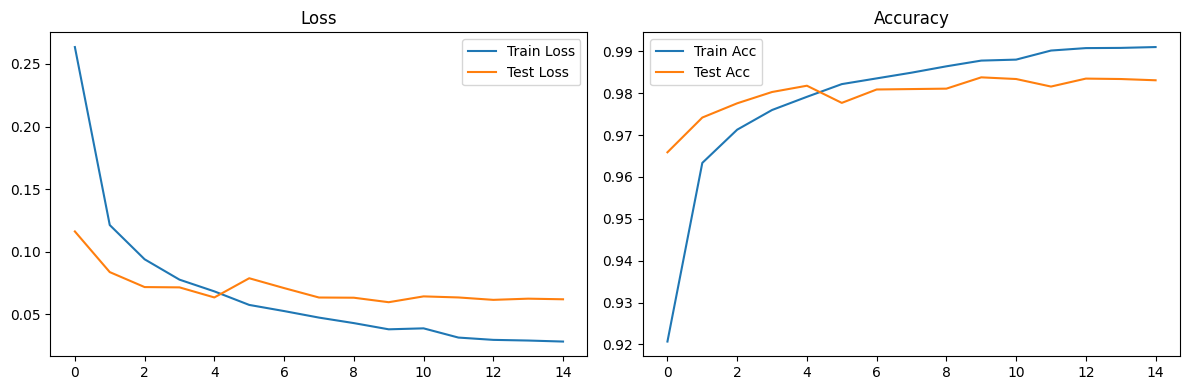

In [18]:
# С Dropout и BatchNorm:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 512}, 
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.2},
            
        {"type": "linear", "size": 256}, 
        {"type": "relu"},
        {"type": "dropout", "rate": 0.1},
        
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=15, device=str(device))

plot_training_history(history) 

Было на последней эпохе: Test Loss: 0.1077, Test Acc: 0.9739

Стало на последней эпохе: Test Loss: 0.0635, Test Acc: 0.9815

Показатели с Dropout и BatchNorm улучшились. 

Переобучение началось с 4 эпохи 
